# Lista 1 de Exercícios para entrega (data limite para entrega 15/09/2025 até as 7:59 AM)

Para envio dos trabalhos deve ser enviado o link url do Notebook colab que deve ser compartilhado e garantido o acesso para leitura.

Apresente os resultados a seguir em forma de relatório: Apresentando:
- Texto corrido o problema(item da tarefa), a descrição de como será solucionado
- Código para solução
- Resultado do código
- Comentários e interpretação caso sejam apropriados

## Probabilidades:

1) Distribuição Binomial(n=10, p=.75): Utilizando a biblioteca scipy.stats calcule:


*   $P(X=8)$
*   $P(X\leq4)$
*   $P(X\geq4)$
*   Agora crie uma função para calcular probabilidades acumuladas da distribuição binomial e refaça as contas dos itens anteriores utilizando sua função.

2) Distribuição Poisson(lambda=10): Utilizando a biblioteca scipy.stats calcule:


*   $P(X=10)$
*   $P(X\leq8)$
*   $P(X\geq8)$
*   Agora crie uma função para calcular probabilidades acumuladas da distribuição binomial e refaça as contas dos itens anteriores utilizando sua função.




# 1) Distribuição Binomial(n=10,p=75)

In [41]:
from scipy.stats import binom

numberTrials = 10   # número de ensaios
probablitySucess = 0.75  # probabilidade de sucesso

## a) Calcule P(X = 8) utilizando scipy.stats:

In [42]:
x = 8

probXmass = binom.pmf(x, numberTrials, probablitySucess)  # pmf = probability mass function

print(f"P(X = {x}) = {probXmass:.4f}")

P(X = 8) = 0.2816


## b) Calcule P(X ≤ 8) utilizando scipy.stats: 

In [43]:
x = 8

probXcumulative = binom.cdf(x, numberTrials, probablitySucess) # cdf = cumulative distribution function

print(f"P(X = {x}) = {probXcumulative:.4f}")

P(X = 8) = 0.7560


## c) Calcule P(X ≥ 8) utilizando scipy.stats: 

In [44]:
x = 8

probXgreaterThan = 1 - binom.cdf(x-1, numberTrials, probablitySucess) # Probabilidade de ao menos x sucessos

print(f"P(X >= {x}) = {probXgreaterThan:.4f}")

P(X >= 8) = 0.5256


# 2) Distribuição Poisson(lambda=10): Utilizando a biblioteca scipy.stats calcule:

In [45]:
from scipy.stats import poisson

# parâmetro lambda
lambda_ = 10


## a) Calcule $P(X=10)$: 

In [46]:
# probabilidade acumulada até X = 8
p_x_leq_8 = poisson.cdf(8, lambda_)
print("P(X <= 8) =", p_x_leq_8)

P(X <= 8) = 0.3328196787507191



## b) Calcule $P(X\leq8)$:

In [47]:
# probabilidade acumulada até X = 8
p_x_leq_8 = poisson.cdf(8, lambda_)
print("P(X <= 8) =", p_x_leq_8)

P(X <= 8) = 0.3328196787507191


## c) Calcule $P(X\geq8)$:

In [48]:
# P(X >= 8) = 1 - P(X <= 7)
p_x_geq_8 = 1 - poisson.cdf(7, lambda_)
print("P(X >= 8) =", p_x_geq_8)

P(X >= 8) = 0.7797793533983011


## d) Agora crie uma função para calcular probabilidades acumuladas da distribuição binomial e refaça as contas dos itens anteriores utilizando sua função.

In [49]:
def binomial_cumulative_prob(n, p, k, kind="<= "):
    """
    Calculates cumulative probabilities of the binomial distribution.
    
    Parameters:
    - n: number of trials
    - p: probability of success in each trial
    - k: number of successes
    - kind: defines the probability type
        "==" → P(X = k)
        "<=" → P(X <= k)
        ">=" → P(X >= k)
    
    Returns:
    - probability (float)
    """
    if kind == "==":
        return binom.pmf(k, n, p)
    elif kind == "<=":
        return binom.cdf(k, n, p)
    elif kind == ">=":
        return 1 - binom.cdf(k-1, n, p)
    else:
        raise ValueError("kind must be '==', '<=' or '>='")

# Using the custom function
probEqual = binomial_cumulative_prob(numberTrials, probablitySucess, x, "==")
probLessEqual = binomial_cumulative_prob(numberTrials, probablitySucess, x, "<=")
probGreaterEqual = binomial_cumulative_prob(numberTrials, probablitySucess, x, ">=")

print(f"P(X = {x}) = {probEqual:.4f}")
print(f"P(X <= {x}) = {probLessEqual:.4f}")
print(f"P(X >= {x}) = {probGreaterEqual:.4f}")

P(X = 8) = 0.2816
P(X <= 8) = 0.7560
P(X >= 8) = 0.5256


## d) Agora crie uma função para calcular probabilidades acumuladas da distribuição binomial e refaça as contas dos itens anteriores utilizando sua função.

In [50]:
from scipy.stats import poisson

def poissonCumulativeProb(lmbda, k, kind="<= "):
    """
    Calculates cumulative probabilities of the Poisson distribution.
    
    Parameters:
    - lmbda: average rate (lambda)
    - k: number of occurrences
    - kind: defines the probability type
        "==" → P(X = k)
        "<=" → P(X <= k)
        ">=" → P(X >= k)
    
    Returns:
    - probability (float)
    """
    if kind == "==":
        return poisson.pmf(k, lmbda)
    elif kind == "<=":
        return poisson.cdf(k, lmbda)
    elif kind == ">=":
        return 1 - poisson.cdf(k-1, lmbda)
    else:
        raise ValueError("kind must be '==', '<=' or '>='")

# parameters
lmbda = 10

# Using the custom function
probPoissonEqual = poissonCumulativeProb(lmbda, 10, "==")
probPoissonLessEqual = poissonCumulativeProb(lmbda, 8, "<=")
probPoissonGreaterEqual = poissonCumulativeProb(lmbda, 8, ">=")

print(f"P(X = {10}) = {probPoissonEqual:.4f}")
print(f"P(X <= {8}) = {probPoissonLessEqual:.4f}")
print(f"P(X >= {8}) = {probPoissonGreaterEqual:.4f}")


P(X = 10) = 0.1251
P(X <= 8) = 0.3328
P(X >= 8) = 0.7798


# 3) Distribuição Normal Padrão: Utilizando a biblioteca scipy.stats crie um dataframe para replicar a tabela da distribuição Normal:

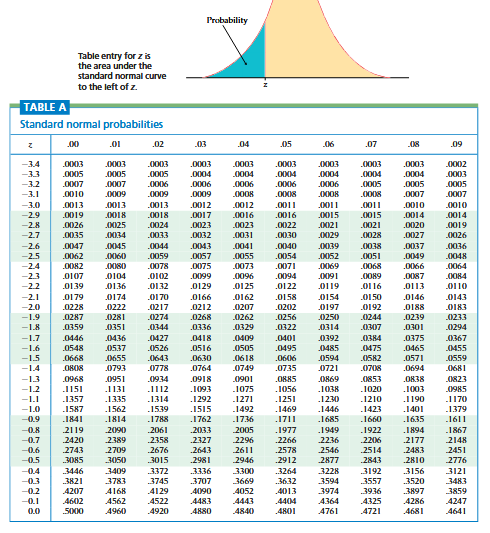





In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# row values: z from -3.4 to 0.0 (one decimal)
z_rows = np.round(np.arange(-3.4, 0.1, 0.1), 1)

# column values: hundredths from 0.00 to 0.09
col_values = np.round(np.arange(0, 0.10, 0.01), 2)
col_names = [f"{c:.2f}" for c in col_values]

# filling the table
table = []
for z in z_rows:
    row = []
    for c in col_values:
        z_total = round(z + c, 4)  
        row.append(norm.cdf(z_total))  
    table.append(row)

# creating DataFrame
df_z_table = pd.DataFrame(table, index=z_rows, columns=col_names)
df_z_table.index.name = "Z"

df_z_table = df_z_table.round(4)

print(df_z_table.head())


        0.00    0.01    0.02    0.03    0.04    0.05    0.06    0.07    0.08  \
Z                                                                              
-3.4  0.0003  0.0003  0.0004  0.0004  0.0004  0.0004  0.0004  0.0004  0.0005   
-3.3  0.0005  0.0005  0.0005  0.0005  0.0006  0.0006  0.0006  0.0006  0.0006   
-3.2  0.0007  0.0007  0.0007  0.0008  0.0008  0.0008  0.0008  0.0009  0.0009   
-3.1  0.0010  0.0010  0.0010  0.0011  0.0011  0.0011  0.0012  0.0012  0.0013   
-3.0  0.0013  0.0014  0.0014  0.0015  0.0015  0.0016  0.0016  0.0017  0.0018   

        0.09  
Z             
-3.4  0.0005  
-3.3  0.0007  
-3.2  0.0009  
-3.1  0.0013  
-3.0  0.0018  


# 4) Distribuição T-student: Utilizando a biblioteca scipy.stats crie um dataframe para replicar a tabela da distribuição T-student:  
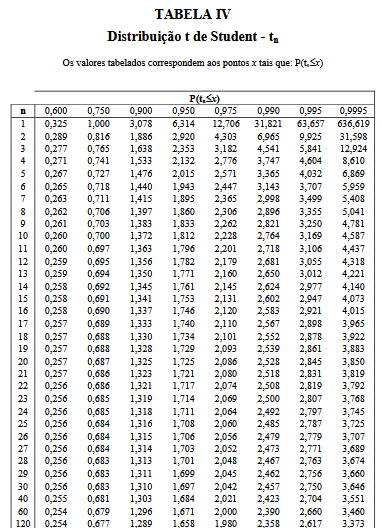

In [52]:
from scipy.stats import t

# graus de liberdade 
dfs = [0.6,0.75,0.9,0.95,0.975,0.99,0.995,0.9995]

# valores de t para a tabela (linhas), de 1 a 120 com passo 1
t_values = range(1, 121, 1)

# preenchendo a tabela
table = []
for t_val in t_values:
    row = []
    for df in dfs:
        # P(T <= t) acumulada
        row.append(t.cdf(t_val, df))
    table.append(row)

# criando DataFrame
df_t_table = pd.DataFrame(table, index=t_values, columns=dfs)
df_t_table.index.name = "t"
df_t_table = df_t_table.round(4)  # arredondando os valores das celulas para 4 casas de precisao

# exibindo as primeiras linhas
print(df_t_table)


     0.6000  0.7500  0.9000  0.9500  0.9750  0.9900  0.9950  0.9995
t                                                                  
1    0.7131  0.7299  0.7429  0.7466  0.7483  0.7493  0.7497  0.7500
2    0.7982  0.8229  0.8420  0.8474  0.8500  0.8514  0.8519  0.8524
3    0.8395  0.8664  0.8867  0.8924  0.8950  0.8966  0.8971  0.8975
4    0.8643  0.8914  0.9115  0.9170  0.9196  0.9210  0.9215  0.9220
5    0.8810  0.9078  0.9272  0.9324  0.9348  0.9363  0.9367  0.9371
..      ...     ...     ...     ...     ...     ...     ...     ...
116  0.9819  0.9912  0.9957  0.9966  0.9969  0.9971  0.9972  0.9972
117  0.9820  0.9913  0.9957  0.9966  0.9969  0.9972  0.9972  0.9973
118  0.9821  0.9913  0.9957  0.9966  0.9970  0.9972  0.9972  0.9973
119  0.9822  0.9914  0.9958  0.9966  0.9970  0.9972  0.9973  0.9973
120  0.9822  0.9914  0.9958  0.9967  0.9970  0.9972  0.9973  0.9973

[120 rows x 8 columns]


# 5) Considere uma distribuição Normal $(\mu=100,\sigma^2=9)$

* Gere aleatóriamente um conjunto de 100 valores
* Qual a proporção dos valores gerados que são menores que 98?
* Qual a probabilidade de valores menores que 98 considerando a distribuição Normal teórica? Compare os resultados e interprete
* Repita o mesmo procedimento mas agora com um conjunto aleatório de 1000 valores e compare os resultados obtidos e comente.

## a) Gerar aleatoriamente um conjunto de 100 valores

In [53]:
import numpy as np

mu = 100
sigma = 3
n1 = 100

# gerar 100 valores aleatórios
np.random.seed(123)  # para reprodutibilidade
sample_100 = np.random.normal(mu, sigma, n1)
print(sample_100[:10])  # mostrando os 10 primeiros valores

[ 96.74310819 102.99203634 100.84893549  95.48111586  98.26419924
 104.95430961  92.71996227  98.71326211 103.79780878  97.39977879]


## b) Proporção dos valores menores que 98 (amostra de 100)

In [54]:
# contar quantos valores são menores que 98
count_less_98_100 = np.sum(sample_100 < 98)

# calcular a proporção
prop_less_98_100 = count_less_98_100 / len(sample_100)
print("Proporção de valores < 98:", prop_less_98_100)

Proporção de valores < 98: 0.33


## c) Probabilidade teórica de valores menores que 98

In [55]:
# probabilidade acumulada P(X < 98)
prob_theoretical = norm.cdf(98, loc=mu, scale=sigma)
print("Probabilidade teórica P(X < 98):", prob_theoretical)

Probabilidade teórica P(X < 98): 0.2524925375469229


## d) Repetir com 1000 valores e comparar

In [56]:
n2 = 1000
# gerar 1000 valores aleatórios
sample_1000 = np.random.normal(mu, sigma, n2)

# proporção de valores menores que 98
prop_less_98_1000 = np.sum(sample_1000 < 98) / len(sample_1000)
print("Proporção de valores < 98:", prop_less_98_1000)


Proporção de valores < 98: 0.256


Ao analisarmos os resultados com 1000 valores aleatórios, observa-se que a proporção de valores menores que 98 se aproximou da probabilidade teórica de 0,252. Comparando com a amostra de 100 valores, onde a proporção observada foi 0,33, vemos que o aumento do tamanho da amostra reduziu a variação aleatória e fez com que a estimativa empírica se aproximasse do valor esperado pela distribuição normal teórica.

Isso ilustra bem a Lei dos Grandes Números, que afirma que, à medida que o número de observações aumenta, a média ou proporção amostral tende a convergir para o valor esperado da distribuição.

## Gráficos

- Fazer o gráficos (sobrepostos) da distribuição normal e distribuições t-student com 5, 10, 50 gl

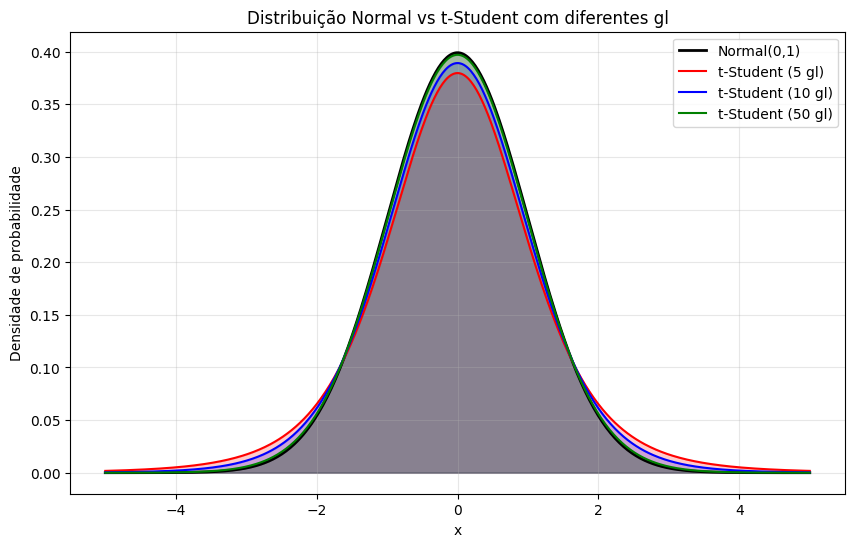

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Definindo intervalo de valores de x
x = np.linspace(-5, 5, 500)

# Distribuição Normal padrão
y_norm = norm.pdf(x, loc=0, scale=1)

# Distribuições t-student
y_t5 = t.pdf(x, df=5)
y_t10 = t.pdf(x, df=10)
y_t50 = t.pdf(x, df=50)

# Plot
plt.figure(figsize=(10,6))

# Normal
plt.plot(x, y_norm, label="Normal(0,1)", color="black", linewidth=2)
plt.fill_between(x, y_norm, alpha=0.2, color="black")

# t-student
plt.plot(x, y_t5, label="t-Student (5 gl)", color="red")
plt.fill_between(x, y_t5, alpha=0.2, color="red")

plt.plot(x, y_t10, label="t-Student (10 gl)", color="blue")
plt.fill_between(x, y_t10, alpha=0.2, color="blue")

plt.plot(x, y_t50, label="t-Student (50 gl)", color="green")
plt.fill_between(x, y_t50, alpha=0.2, color="green")

# Configurações
plt.title("Distribuição Normal vs t-Student com diferentes gl")
plt.xlabel("x")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Considere os dados de energia elétrica utilizados em aula anterior

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dados = pd.read_csv("https://github.com/edunb01/dotfiles/raw/refs/heads/master/TarifaFornecimentoResidencial.csv",encoding="latin1")
dados.head()

,ideTarifaFornecimento,nomConcessao,SigDistribuidora,SigRegiao,VlrTUSDConvencional,VlrTEConvencional,VlrTotaTRFConvencional,VlrTRFBrancaPonta,VlrTRFBrancaIntermediaria,VlrTRFBrancaForaPonta,NumResolucao,DthInicioVigencia,DthProcessamento
0,315,Concessionária,AmE,N,0.41472,0.29134,0.70606,1.25504,0.84700,0.61792,2478/2018,01/11/2018 00:00:00,26/07/2019 00:00:00
1,316,Concessionária,Boa Vista,N,0.32810,0.30652,0.63462,1.25491,0.78768,0.52678,2479/2018,01/11/2018 00:00:00,26/07/2019 00:00:00
2,317,Permissionária,CASTRO - DIS,S,0.16845,0.16256,0.33101,0.53660,0.41108,0.28557,2477/2018,01/07/2018 00:00:00,26/07/2019 00:00:00
3,318,Concessionária,CEA,N,0.40338,0.16300,0.56638,1.23492,0.79378,0.46930,2495/2018,01/11/2018 00:00:00,26/07/2019 00:00:00
4,319,Concessionária,Ceal,NE,0.30413,0.23112,0.53525,1.12359,0.71562,0.45231,2540/2019,01/05/2019 00:00:00,26/07/2019 00:00:00


- Fazer histograma dos preços de VlrTUSDConvencional

- Fazer boxplot comparando preços de VlrTUSDConvencional 	 de concessionárias e permissionárias

- Preparar visualização para as diferentes regiões entre concessionárias e permissionárias - Quantitativos dos tipos e Comparação de preços VlrTUSDConvencional

- Comparar graficamente as médias e distribuições de preço da bandeira branca com os preços VlrTotaTRFConvencional

- Fazer um gráfico de dispersão com os valores VlrTotaTRFConvencional de cada empresa, mas com cores de cada região, linhas horizontais para médias de cada região e média geral

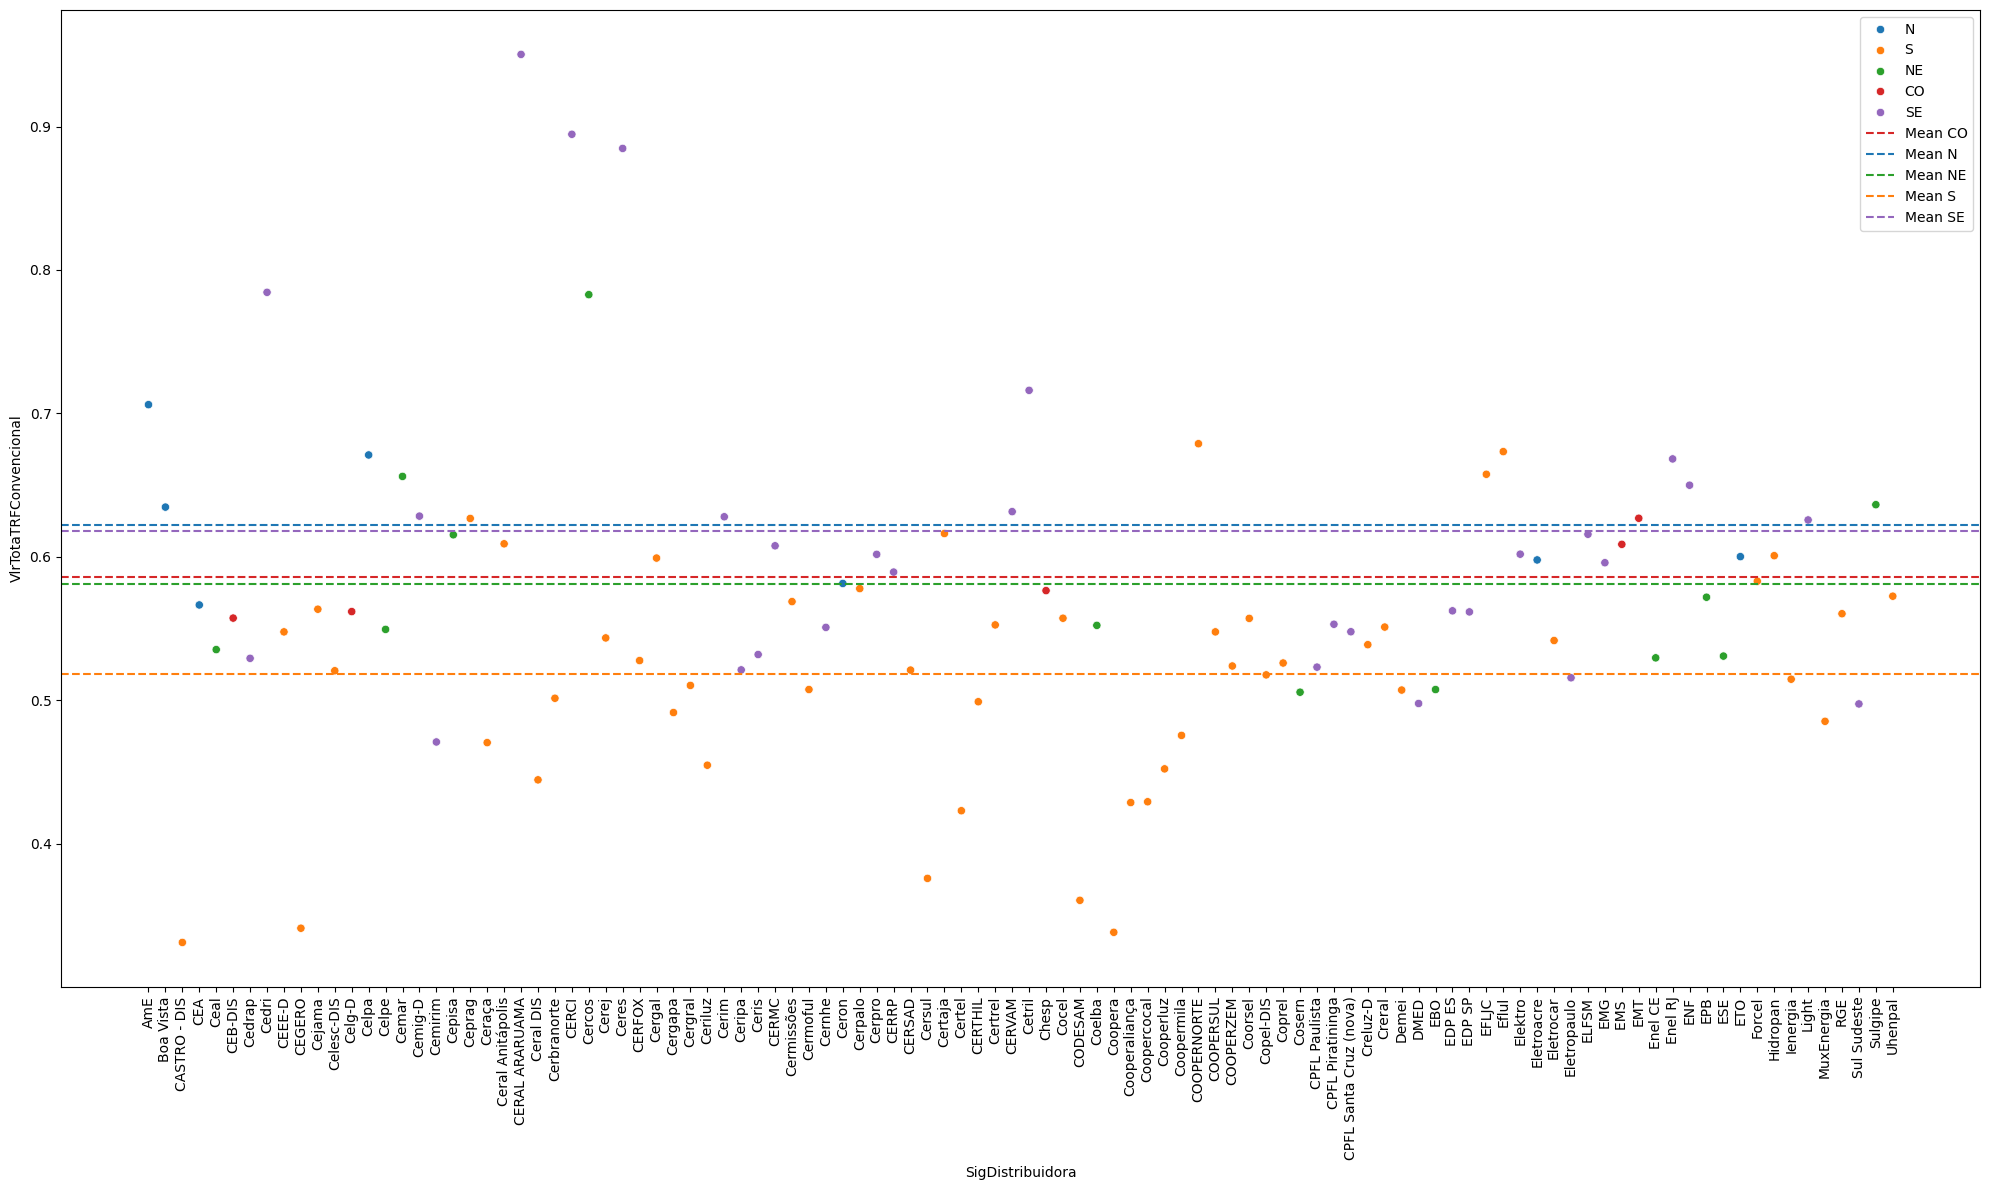

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a palette based on unique regions
regions = dados['SigRegiao'].unique()
palette = sns.color_palette("tab10", n_colors=len(regions))
color_dict = dict(zip(regions, palette))  # Map each region to a color

# Scatter plot
fig = plt.figure(figsize=(20,12))
sns.scatterplot(
    data=dados,
    y='VlrTotaTRFConvencional',
    x='SigDistribuidora',
    hue='SigRegiao',
    palette=color_dict
)

plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

# Calculate mean per region
medias = dados.groupby('SigRegiao')['VlrTotaTRFConvencional'].mean().to_dict()

# Draw horizontal lines with the same colors as points
for regiao, media in medias.items():
    plt.axhline(
        y=media,
        color=color_dict[regiao],  # Same color as scatter
        linestyle='--',
        linewidth=1.5,
        label=f'Mean {regiao}'
    )

plt.legend()
plt.show()


## 6a) Fazer histograma dos preços de VlrTUSDConvencional

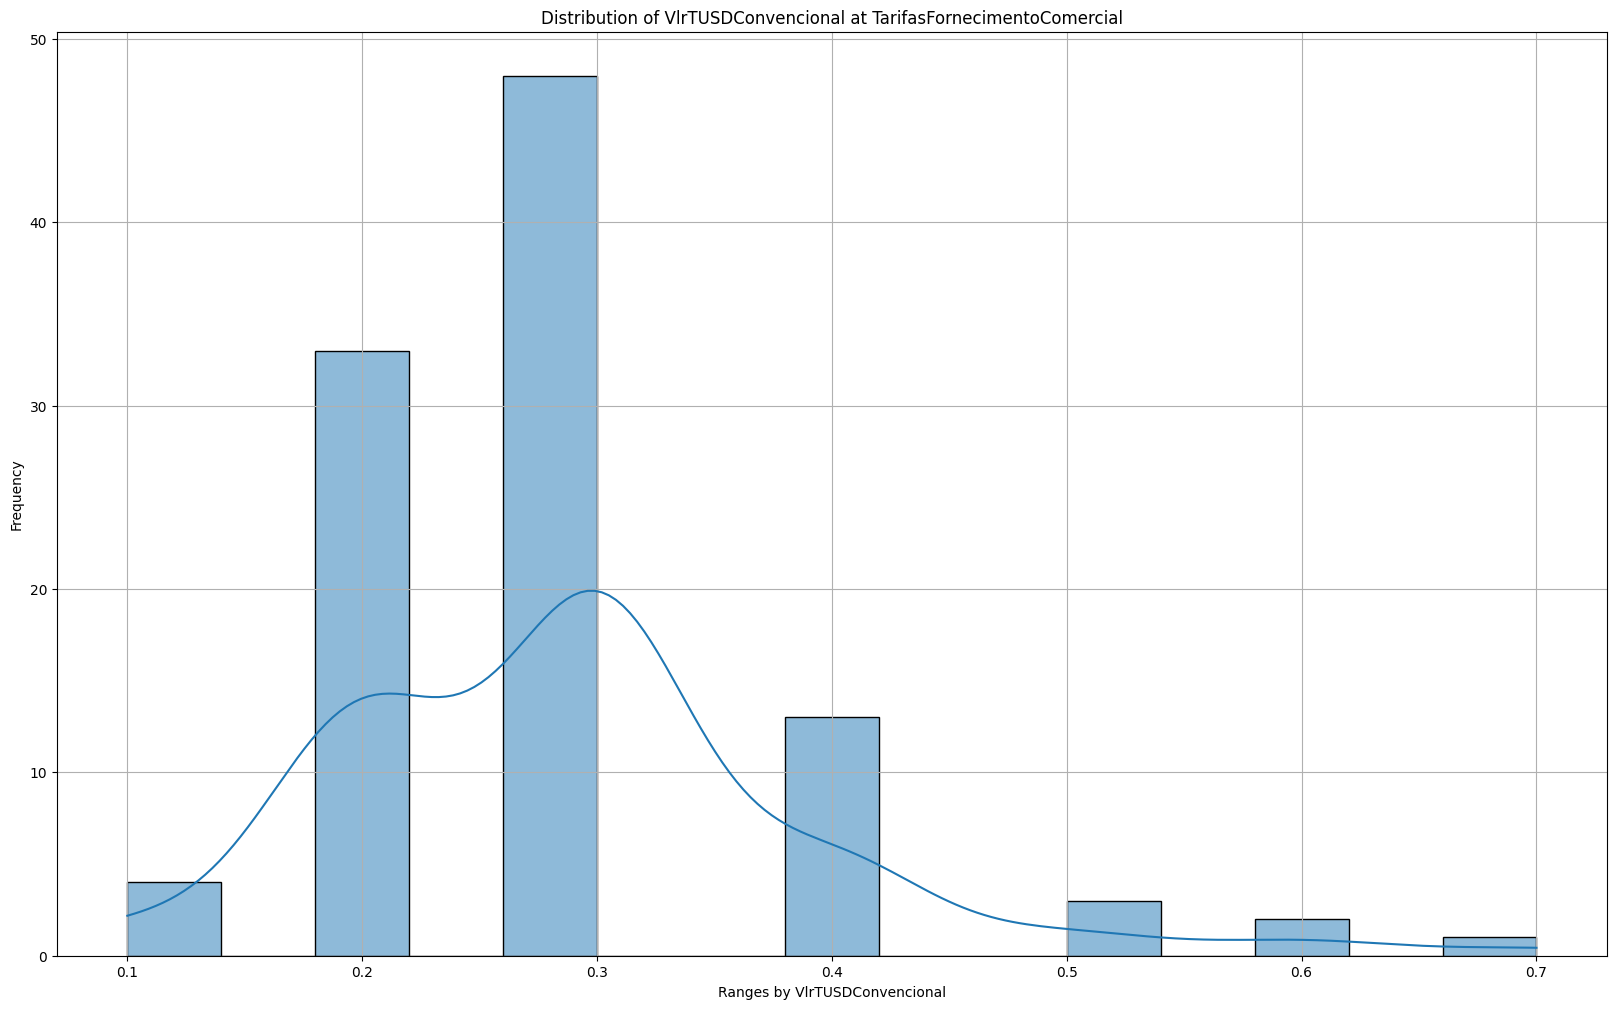

In [18]:
dados['VlrTUSDConvencionalInterval'] = (dados['VlrTUSDConvencional'] * 10).astype(int) / 10

fig = plt.figure(figsize=(20, 12))
sns.histplot(data=dados, x='VlrTUSDConvencionalInterval', kde=True)
plt.title('Distribution of VlrTUSDConvencional at TarifasFornecimentoComercial')
plt.xlabel('Ranges by VlrTUSDConvencional')
plt.ylabel('Frequency')
plt.grid(True)


## 6b) Fazer boxplot comparando preços de VlrTUSDConvencional 	 de concessionárias e permissionárias


Text(0, 0.5, 'VlrTUSDConvencional')

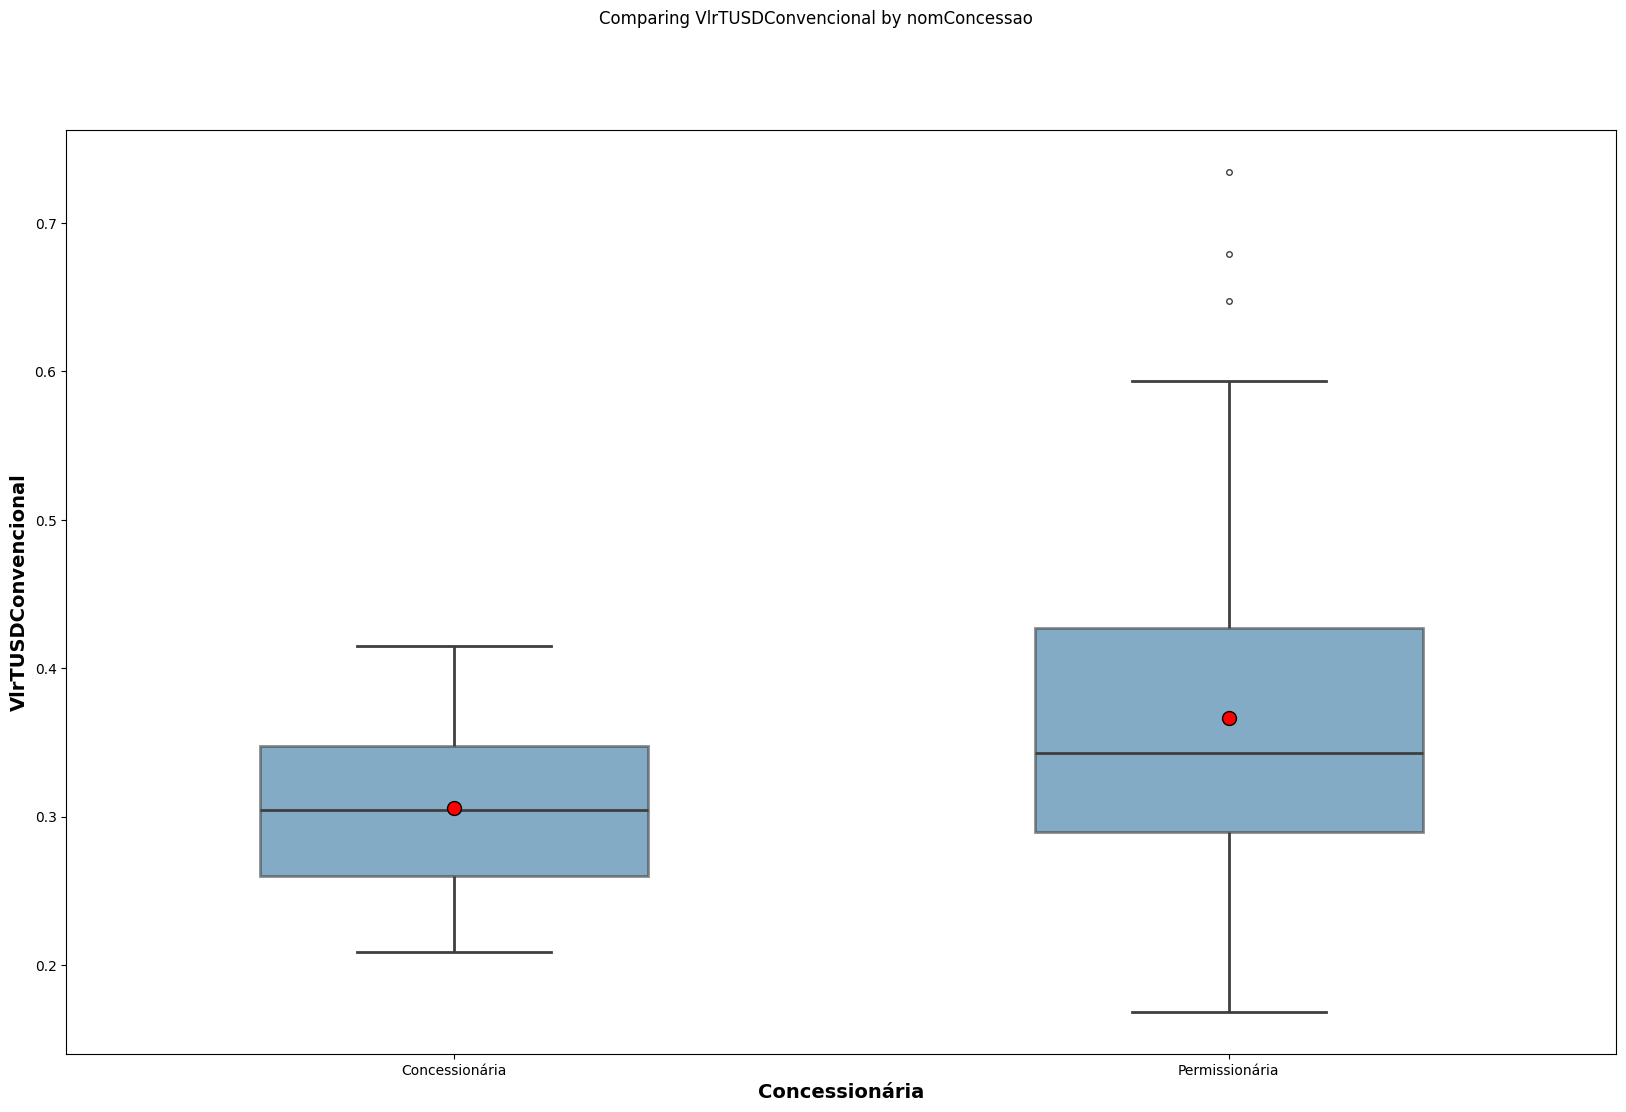

In [30]:
fig = plt.figure(figsize=(20,12))
sns.boxplot(
    data=dados, 
    x='nomConcessao', 
    y='VlrTUSDConvencional',
    showmeans=True,
    order=dados.groupby("nomConcessao")["VlrTUSDConvencional"].median().sort_values().index,
    meanprops={"marker":"o",
               "markerfacecolor":"red", 
               "markeredgecolor":"black",
               "markersize":"10"},
    width=0.5,       # width of box
    linewidth=2,     
    fliersize=4,     # size of outliers
    boxprops=dict(alpha=0.6)  # transparency
)
fig.suptitle("Comparing VlrTUSDConvencional by nomConcessao")
plt.xlabel("Concessionária", fontsize=14, fontweight="bold")
plt.ylabel("VlrTUSDConvencional", fontsize=14, fontweight="bold")


## 6c) Preparar visualização para as diferentes regiões entre concessionárias e permissionárias - Quantitativos dos tipos e Comparação de preços VlrTUSDConvencional

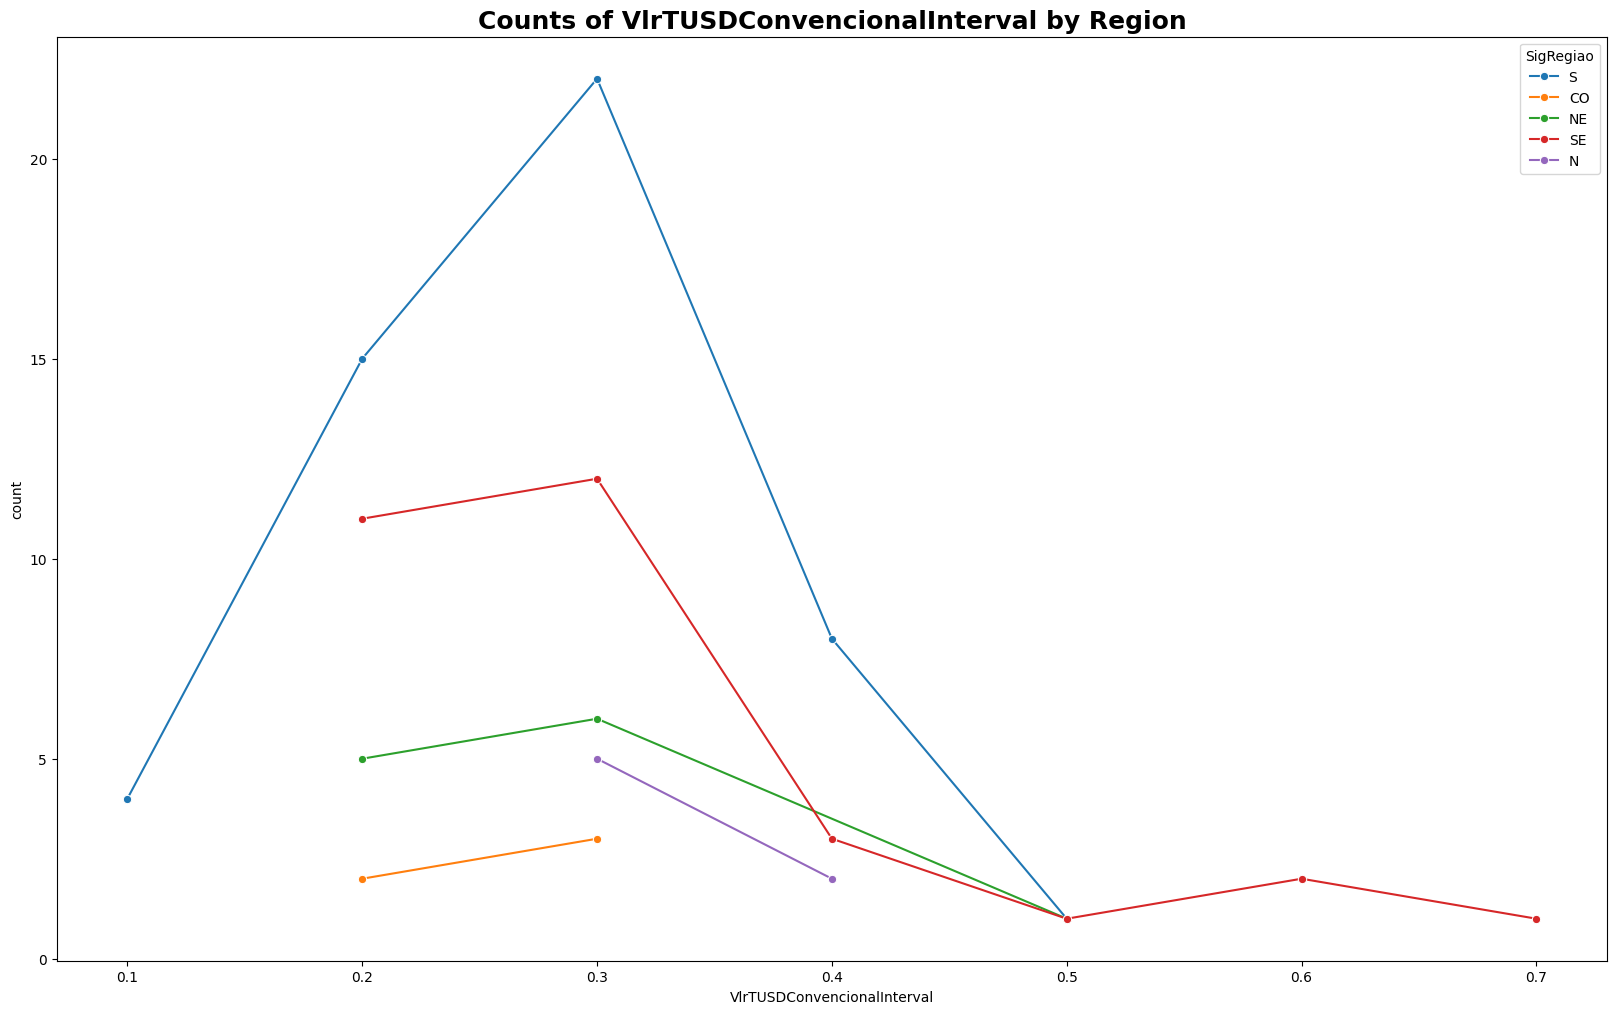

In [37]:
# count how many values exist in each interval and region

counts = (
    dados.groupby(["VlrTUSDConvencionalInterval", "SigRegiao"])
         .size()
         .reset_index(name="count")
)

fig = plt.figure(figsize=(20,12))
sns.lineplot(
    data=counts,
    x="VlrTUSDConvencionalInterval",
    y="count",
    hue="SigRegiao",
    marker="o"
)

plt.title("Counts of VlrTUSDConvencionalInterval by Region", fontsize=18, fontweight="bold")
plt.show()

## 6d) Comparar graficamente as médias e distribuições de preço da bandeira branca com os preços VlrTotaTRFConvencional

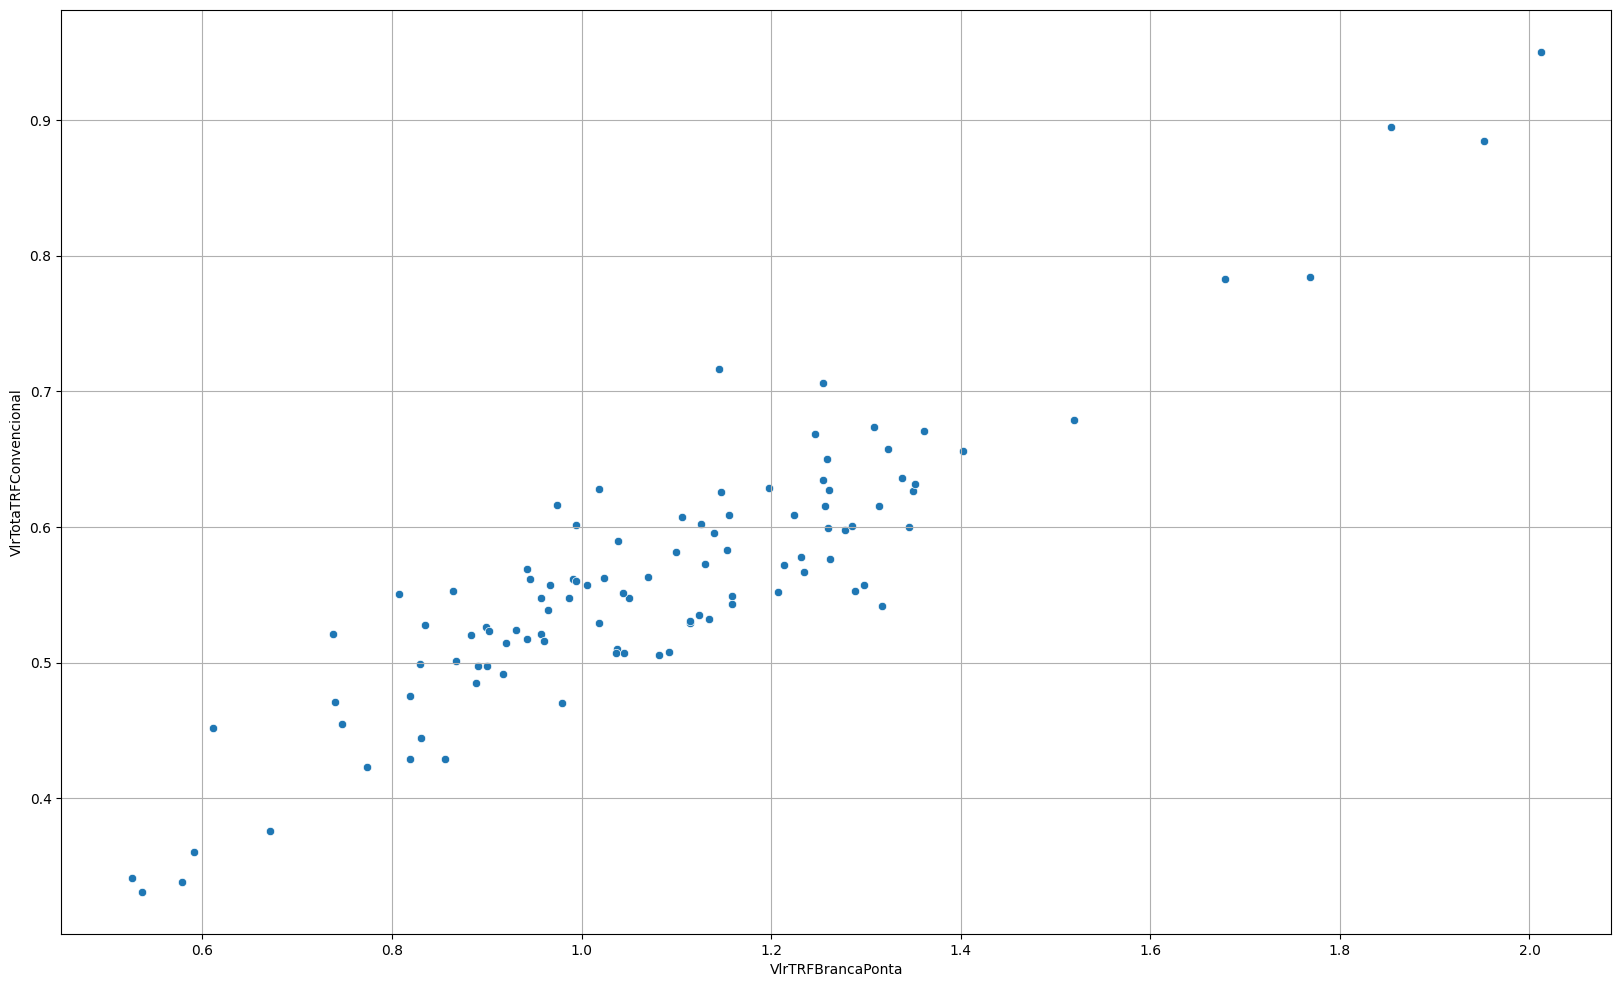

In [41]:
fig = plt.figure(figsize=(20,12))
sns.scatterplot(data = dados, 
                y = 'VlrTotaTRFConvencional',
                x='VlrTRFBrancaPonta', 
)
plt.grid(True)


## 6e) Fazer um gráfico de dispersão com os valores VlrTotaTRFConvencional de cada empresa, mas com cores de cada região, linhas horizontais para médias de cada região e média geral

In [ ]:
# Create a palette based on unique regions
regions = dados['SigRegiao'].unique()
palette = sns.color_palette("tab10", n_colors=len(regions))
color_dict = dict(zip(regions, palette))  # Map each region to a color

# Scatter plot
fig = plt.figure(figsize=(20,12))
sns.scatterplot(
    data=dados,
    y='VlrTotaTRFConvencional',
    x='SigDistribuidora',
    hue='SigRegiao',
    palette=color_dict
)

plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

# Calculate mean per region
medias = dados.groupby('SigRegiao')['VlrTotaTRFConvencional'].mean().to_dict()

# Draw horizontal lines with the same colors as points
for regiao, media in medias.items():
    plt.axhline(
        y=media,
        color=color_dict[regiao],  # Same color as scatter
        linestyle='--',
        linewidth=1.5,
        label=f'Mean {regiao}'
    )

plt.legend()
plt.show()
